<a href="https://colab.research.google.com/github/Christian-valino/Filmes_mais_bem_avaliados/blob/main/Filmes_mais_bem_avaliados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUÇÃO

Essa analise tem como objetivo entender mais sobre os filmes melhor avaliados e responder algumas perguntas como:
- genero influencia na avaliação
- duração media dos filmes
- relação filme ator

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


## Importando Dataset e obtendo informações

In [4]:
# Arquivo csv
base = pd.read_csv('movie.csv')
display(base)

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477
...,...,...,...,...,...,...,...,...
8575,8575,10723,Bulletproof,An undercover police officer named Rock Keats ...,1996-09-06,12.428,5.700,569
8576,8576,397422,Rough Night,Five best friends from college reunite 10 year...,2017-06-15,19.368,5.688,1963
8577,8577,70435,Haywire,A black ops soldier seeks payback after she is...,2011-11-01,17.259,5.700,1333
8578,8578,36599,Prom Night,"At a high school senior prom, a masked killer ...",1980-07-18,15.854,5.700,414


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8580 non-null   int64  
 1   id            8580 non-null   int64  
 2   title         8580 non-null   object 
 3   overview      8579 non-null   object 
 4   release_date  8580 non-null   object 
 5   popularity    8580 non-null   float64
 6   vote_average  8580 non-null   float64
 7   vote_count    8580 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 536.4+ KB


Aqui podemos verificar as colunas do dataset, o tipo de dado em cada coluna, além de verificar se o dataset possui valores nulos.
a coluna overview possui 857 linhas, indicando que possivelmente possui um valor nulo nessa coluna.

In [7]:
# verificar valores nulos
base.isnull().sum()

,0
Unnamed: 0,0
id,0
title,0
overview,0
release_date,0
popularity,0
vote_average,0
vote_count,0


In [6]:
# preenchendo valor nulo
for col in base.select_dtypes(include='object').columns:
    base[col] = base[col].fillna(base[col].mode()[0])
base.isnull().sum()

,0
Unnamed: 0,0
id,0
title,0
overview,0
release_date,0
popularity,0
vote_average,0
vote_count,0


## Limpeza do Dataset

In [8]:
# apagando colunas que nao serão utilizadas
base.drop(columns = ['Unnamed: 0'], inplace = True)


In [9]:
# alterando nome das colunas
base = base.rename(columns={'title': 'titulo', 'overview': 'sinopse', 'release_date': 'lançamento', 'popularity': 'popularidade', 'vote_average': 'media_votos', 'vote_count': 'contagem_votos'})
base.head()

,id,titulo,sinopse,lançamento,popularidade,media_votos,contagem_votos
0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477


In [10]:
# alterando tipo de dado da coluna lançamento object para datetime
base['lançamento'] = pd.to_datetime(base['lançamento'], errors='coerce')
base['lançamento'].head()

,lançamento
0,2022-05-13
1,1994-03-30
2,2009-07-30
3,2008-07-22
4,2000-08-25


## Analise exploratoria

In [11]:
# descricao estatistica
base.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,8580.0,196409.533450,260883.728598,2.000,9922.75000,34612.0000,363603.25000,1212073.000
popularidade,8580.0,29.863904,53.930147,0.023,14.72275,20.9455,32.02775,3011.577
media_votos,8580.0,6.804031,0.628188,5.688,6.30000,6.7690,7.27200,8.706
contagem_votos,8580.0,2104.044172,3264.360149,300.000,477.00000,895.0000,2137.50000,36238.000


In [12]:
#boxsplot
for i in base.select_dtypes(include='number').columns:
    fig = px.box(base, x=i)


    fig.update_layout(
        title=f'Boxplot de {i}',
        height=300,
        width=600
    )

    # Mostrando o gráfico
    fig.show()


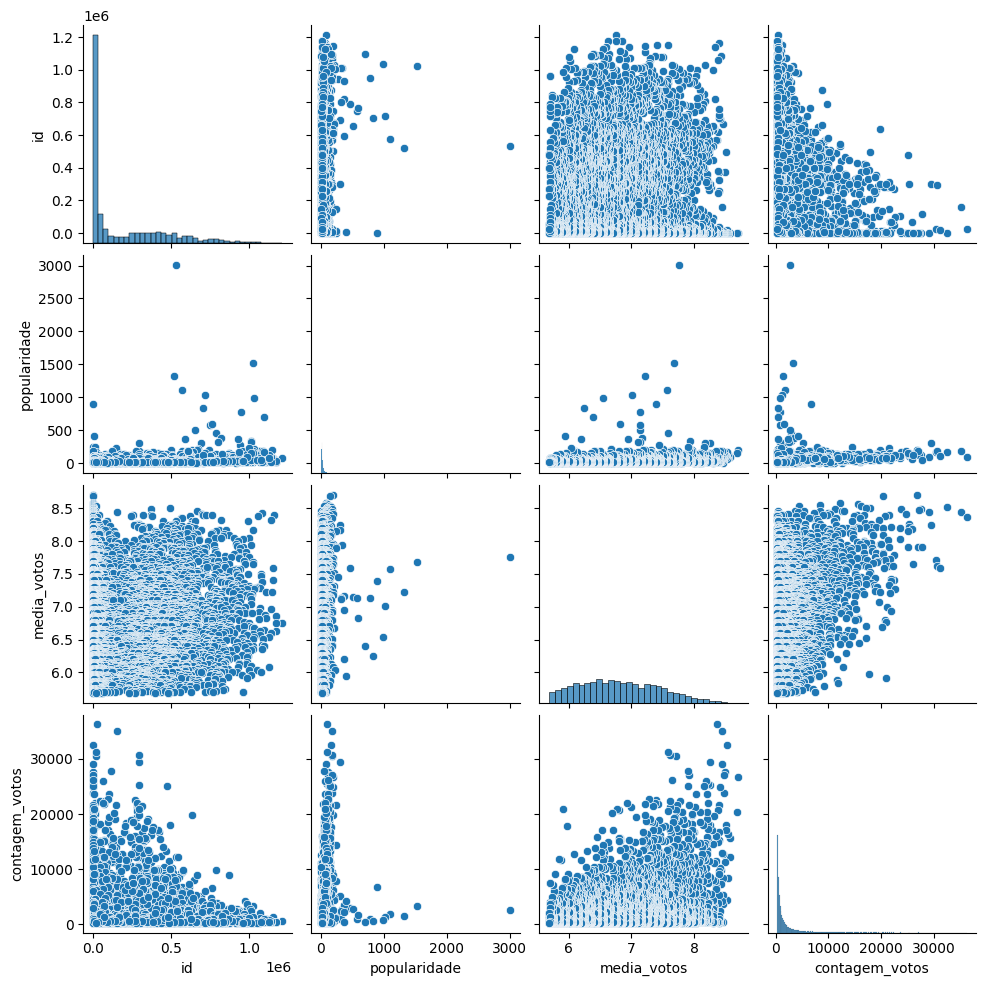

In [ ]:
#Pairplot
sns.pairplot(base)
plt.show()

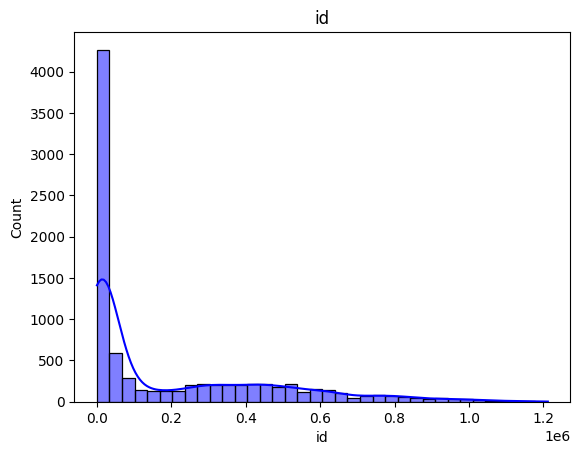

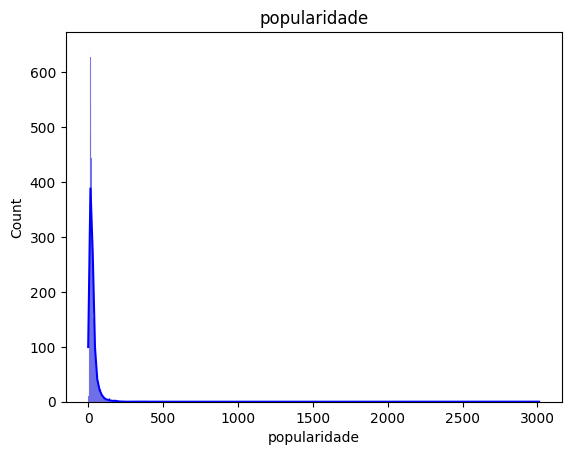

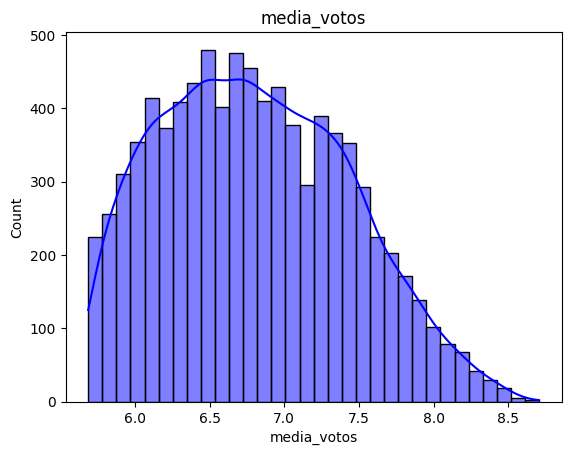

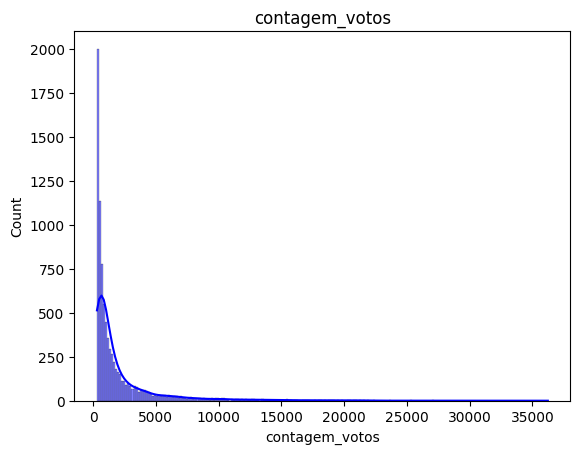

In [ ]:
#Histograma para entender a Distribuição
for i in base.select_dtypes(include = 'number').columns:
    sns.histplot(data = base, x = i, kde = True, color = 'blue')
    plt.title(f'{i}')
    plt.show()

In [13]:
#Top 10 filmes
top_10_popular = base.nlargest(10, 'popularidade')
fig = px.bar(top_10_popular,
             x = 'titulo',
             y = 'popularidade',
             title = 'Top 10 Filmes mais populares',
            text_auto = True,
            color = 'titulo')
fig.show()

In [14]:
#filmes lancados por ano
por_ano = base['lançamento'].value_counts().sort_index()

fig = px.line(
    x=por_ano.index,
    y=por_ano.values,
    labels={'x': 'Ano', 'y': 'Número de Filmes'},
    title='Lançamentos por Ano'
)

fig.show()
